In [0]:
import tensorflow.compat.v1 as tf
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newwire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [0]:
import numpy as np

def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, seq in enumerate(seq):
        results[i, seq] = 1.
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [0]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
from keras.callbacks import LambdaCallback

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[2].get_weights()))

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[print_weights]
                    )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7680/7982 [===========================>..] - ETA: 0s - loss: 2.6983 - acc: 0.4398[array([[ 0.21939068, -0.05237813,  0.12040868, ...,  0.07243197,
        -0.17185019, -0.04731107],
       [-0.18334694, -0.10106348,  0.19081245, ...,  0.13679087,
         0.20717469, -0.21640095],
       [-0.04365095,  0.12784967, -0.11118723, ..., -0.10005853,
         0.22784685,  0.09637117],
       ...,
       [-0.03453232, -0.12889019, -0.18817902, ...,  0.20151693,
         0.13822706,  0.07724215],
       [-0.17007747,  0.20506877, -0.03685014, ...,  0.14619151,
        -0.05419957,  0.04726028],
       [ 0.13972726,  0.02972012, -0.04384885, ...,  0.03673534,
        -0.00558024, -0.1043513 ]], dtype=float32), array([ 0.00704067,  0.01915149,  0.01468914,  0.01617622, -0.0139829 ,
        0.02341874,  0.01808368,  0.00713654,  0.00901693, -0.00935451,
        0.02117849,  0.02236958,  0.01667638, -0.01505542, -0.00149343,
        0.0185

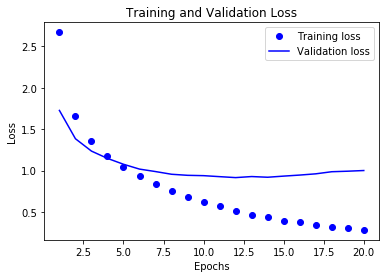

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

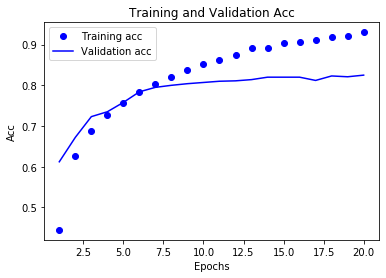

In [36]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
